<a href="https://colab.research.google.com/github/MarkWMavis/MachineLearning_FruitsProject/blob/main/CSS486_Project_Fruit_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing GPU Runtime

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Dec 15 00:09:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Testing High Speed RAM

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# 1. Importing Libraries

In [ ]:
#Importing Scientific computing package for python. Library that provides a multidimential array
# object, various derived objects (such as masked arrays and matrices), and an assortment of 
# routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting,
# selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random
# simulation and much more
import numpy as np

#Importing Pythons Open Source Data Analysis and manipulation library
import pandas as pd

#Importing Pythons Open Computer Vision Library that is designed to solve computer vision problems.
import cv2 as cv

from google.colab.patches import cv2_imshow  # for image display
from skimage import io 
from PIL import Image
import matplotlib.pylab as plt
import pathlib  #Object-Oriented Filesystem paths functionality
                #This module offers classes representing filesystem paths.
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D
from tensorflow.keras.utils import to_categorical
import h5py
from numpy import genfromtxt

# 2. Downloading Datasets

## 2.1 Downloading Combined Dataset

In [ ]:
!wget -O /content/Combined_Dataset.zip https://www.dropbox.com/s/ka9ii0ju8479cq9/Combined%20Dataset.zip?dl=0
!unzip "/content/Combined_Dataset.zip" -d "/content/Combined_Dataset/"

--2021-12-15 00:43:53--  https://www.dropbox.com/s/ka9ii0ju8479cq9/Combined%20Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ka9ii0ju8479cq9/Combined%20Dataset.zip [following]
--2021-12-15 00:43:54--  https://www.dropbox.com/s/raw/ka9ii0ju8479cq9/Combined%20Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca5c3f8f57ed665457b3b911351.dl.dropboxusercontent.com/cd/0/inline/Bb1qpav8ffp510hENGS6a3mkcsNB34NT7zvl2VORSJe9fSBZB32qtaX8u_ccVpNTBdqn3zt9nNOz02NblggYokZ8ozNj617i4xj98Z7_Zc3grqpQRwrIEmNG0kGcXM2zTOK3CkXqLkXYXHxjsu5OoHe9/file# [following]
--2021-12-15 00:43:54--  https://uca5c3f8f57ed665457b3b911351.dl.dropboxusercontent.com/cd/0/inline/Bb1qpav8ffp510hENGS6a3mkcsNB34NT7zvl2VORSJe9fSBZB32qtaX

## 2.2 Downloading PreSplit 80/20 Dataset

In [ ]:
!wget -O /content/PreSplit_Dataset.zip https://www.dropbox.com/s/brivqjp3g8ob31z/PreSplit%20Dataset.zip?dl=0
!unzip "/content/PreSplit_Dataset.zip" -d "/content/PreSplit_Dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/PreSplit_Dataset/ColorCorrected_Training/Apple Golden 1/r_311_100.jpg  
  inflating: /content/PreSplit_Dataset/ColorCorrected_Training/Apple Golden 1/r_312_100.jpg  
  inflating: /content/PreSplit_Dataset/ColorCorrected_Training/Apple Golden 1/r_313_100.jpg  
  inflating: /content/PreSplit_Dataset/ColorCorrected_Training/Apple Golden 1/r_314_100.jpg  
  inflating: /content/PreSplit_Dataset/ColorCorrected_Training/Apple Golden 1/r_315_100.jpg  
  inflating: /content/PreSplit_Dataset/ColorCorrected_Training/Apple Golden 1/r_316_100.jpg  
  inflating: /content/PreSplit_Dataset/ColorCorrected_Training/Apple Golden 1/r_317_100.jpg  
  inflating: /content/PreSplit_Dataset/ColorCorrected_Training/Apple Golden 1/r_318_100.jpg  
  inflating: /content/PreSplit_Dataset/ColorCorrected_Training/Apple Golden 1/r_319_100.jpg  
  inflating: /content/PreSplit_Dataset/ColorCorrected_Training/Apple Golden 1/r_320_100.jpg  
  inflati

# Checking Directories for Colob Checkpoints

IMPORTANT: DO NOT RUN THIS SECTION WHEN GRADING. This is a utility that I used to search for a file that google colab was auto placing into the image directories that was messing up my CSV Object Classes during the preprocessing phase

In [ ]:
#data = pathlib.Path('/content/Combined_Dataset/ColorCorrected_Dataset/')
#data = pathlib.Path('/content/Combined_Dataset/ColorCast_Dataset/')
#data = pathlib.Path('/content/PreSplit_Dataset/ColorCast_Testing/')
#data = pathlib.Path('/content/PreSplit_Dataset/ColorCast_Training/')
#data = pathlib.Path('/content/PreSplit_Dataset/ColorCorrected_Testing/')
#data = pathlib.Path('/content/PreSplit_Dataset/ColorCorrected_Training/')

#Creating a list of all fruit Directories
directories = list(data.glob('*'))   

for file in directories:
  print(file)


#Compile CSV files for PreSplit 80/20 Color Corrected Dataset
IMPORTANT: DO NOT RUN THIS SECTION WHEN GRADING. This is the preprocessing section which iterates through all images in all directories of the PreSplit 80/20 Training Dataset and creates csv files will all RGB data. These CSV files have been pre-compiled and included in the zip files for the graders convience to aviod the long compile times. The following 3 sections have just been included to show the scope of work completed in project

## Create PreSplit Color Corrected CSV files

In [ ]:
#CREATING COLOR CORRECTED TRAINING CSV FILE

data = pathlib.Path('/content/PreSplit_Dataset/ColorCorrected_Training')

#Creating a list of all fruit Directories
directories = list(data.glob('*'))    

#Checking The number of directories in the list
print(len(directories))    

#Processing Stats
imagecount = 0;     #Variable to track the number of photos processed
objectcode = 0      #The number or label to assign to each of the fruit classes

#Creates and Opens a new delimited file title "_x.csv" at the end of the data path
# that will be used to write all RGB pixel values to
f = open("/content/PreSplit_Dataset/ColorCorrected_Training_x.csv", "w")

#Creates and Opens a new delimited file title "_y.csv" at the end of the data path
# that will be used to write all class labels (integer values) of each fruit trained on
result = open("/content/PreSplit_Dataset/ColorCorrected_Training_y.csv", "w")

#For loop iterating through each directory in the directories list
for i in directories:    
  
  #Variable to Track current image class number
  objectcode += 1 
  
  #Instantiating the Path Object at location i where all of the images live
  files = pathlib.Path(i) 
  
  #Creating a list of all images in the file path
  images = list(files.glob('*.jpg'))

  #Adding number of images in that directory to the total image count
  imagecount += len(images)

  #Iterating through each image in the list of images
  for img in images:
    
    #Printing Image path for feedback on progress
    print(img)

    img_data = cv.imread(str(img), cv.IMREAD_COLOR)   #Loads an image in a color format 
    for x in range(0, 100):     #Control Statement for the Rows of pixels in image
      for y in range(0, 100):   #Control Statement for the Columns of pixels in image
        (b, g, r) = img_data[x, y]    #Collects the RGB values of pixel
        f.write(str(r).zfill(3) + str(g).zfill(3) + str(b).zfill(3))    #Formats the RGB values for readability
        if(x == 99 and y == 99):    #If at the end of the row of pixels, start new line
          f.write("\n")
        else:
          f.write(",")              #While not at the end of pixel row, delimit the RGB values
    result.write(str(objectcode))   #Creating the Object Labels in seperate file
    result.write("\n")              #Moving to new line
f.close()     #closing the Pixel data file
result.close()    #closing the object labels file

#CREATING COLOR CORRECTED TRAINING CSV FILE
data = pathlib.Path('/content/PreSplit_Dataset/ColorCorrected_Testing')

#Creating a list of all fruit Directories
directories = list(data.glob('*'))    

#Checking The number of directories in the list
print(len(directories))    

#Processing Stats
imagecount = 0;     #Variable to track the number of photos processed
objectcode = 0      #The number or label to assign to each of the fruit classes

#Creates and Opens a new delimited file title "_x.csv" at the end of the data path
# that will be used to write all RGB pixel values to
f = open("/content/PreSplit_Dataset/ColorCorrected_Testing_x.csv", "w")

#Creates and Opens a new delimited file title "_y.csv" at the end of the data path
# that will be used to write all class labels (integer values) of each fruit trained on
result = open("/content/PreSplit_Dataset/ColorCorrected_Testing_y.csv", "w")

#For loop iterating through each directory in the directories list
for i in directories:    
  
  #Variable to Track current image class number
  objectcode += 1 
  
  #Instantiating the Path Object at location i where all of the images live
  files = pathlib.Path(i) 
  
  #Creating a list of all images in the file path
  images = list(files.glob('*.jpg'))

  #Adding number of images in that directory to the total image count
  imagecount += len(images)

  #Iterating through each image in the list of images
  for img in images:
    
    #Printing Image path for feedback on progress
    print(img)

    img_data = cv.imread(str(img), cv.IMREAD_COLOR)   #Loads an image in a color format 
    for x in range(0, 100):     #Control Statement for the Rows of pixels in image
      for y in range(0, 100):   #Control Statement for the Columns of pixels in image
        (b, g, r) = img_data[x, y]    #Collects the RGB values of pixel
        f.write(str(r).zfill(3) + str(g).zfill(3) + str(b).zfill(3))    #Formats the RGB values for readability
        if(x == 99 and y == 99):    #If at the end of the row of pixels, start new line
          f.write("\n")
        else:
          f.write(",")              #While not at the end of pixel row, delimit the RGB values
    result.write(str(objectcode))   #Creating the Object Labels in seperate file
    result.write("\n")              #Moving to new line
f.close()     #closing the Pixel data file
result.close()    #closing the object labels file

## Create PreSplit Color Cast CSV files

In [ ]:
#Step 1. Run this first and comment out and run next command
data = pathlib.Path('/content/PreSplit_DataSet/ColorCast_Training')

#Creating a list of all fruit Directories
directories = list(data.glob('*'))    

#Checking The number of directories in the list
print(len(directories))    

#Processing Stats
imagecount = 0;     #Variable to track the number of photos processed
objectcode = 0      #The number or label to assign to each of the fruit classes

#Creates and Opens a new delimited file title "_x.csv" at the end of the data path
# that will be used to write all RGB pixel values to
f = open("/content/PreSplit_Dataset/ColorCast_Training_x.csv", "w")

#Creates and Opens a new delimited file title "_y.csv" at the end of the data path
# that will be used to write all class labels (integer values) of each fruit trained on
result = open("/content/PreSplit_Dataset/ColorCast_Training_y.csv", "w")

#For loop iterating through each directory in the directories list
for i in directories:    
  
  #Variable to Track current image class number
  objectcode += 1 
  
  #Instantiating the Path Object at location i where all of the images live
  files = pathlib.Path(i) 
  
  #Creating a list of all images in the file path
  images = list(files.glob('*.jpg'))

  #Adding number of images in that directory to the total image count
  imagecount += len(images)

  #Iterating through each image in the list of images
  for img in images:
    
    #Printing Image path for feedback on progress
    print(img)

    img_data = cv.imread(str(img), cv.IMREAD_COLOR)   #Loads an image in a color format 
    for x in range(0, 100):     #Control Statement for the Rows of pixels in image
      for y in range(0, 100):   #Control Statement for the Columns of pixels in image
        (b, g, r) = img_data[x, y]    #Collects the RGB values of pixel
        f.write(str(r).zfill(3) + str(g).zfill(3) + str(b).zfill(3))    #Formats the RGB values for readability
        if(x == 99 and y == 99):    #If at the end of the row of pixels, start new line
          f.write("\n")
        else:
          f.write(",")              #While not at the end of pixel row, delimit the RGB values
    result.write(str(objectcode))   #Creating the Object Labels in seperate file
    result.write("\n")              #Moving to new line
f.close()     #closing the Pixel data file
result.close()    #closing the object labels file

data = pathlib.Path('/content/PreSplit_Dataset/ColorCast_Testing')

#Creating a list of all fruit Directories
directories = list(data.glob('*'))    

#Checking The number of directories in the list
print(len(directories))    

#Processing Stats
imagecount = 0;     #Variable to track the number of photos processed
objectcode = 0      #The number or label to assign to each of the fruit classes

#Creates and Opens a new delimited file title "_x.csv" at the end of the data path
# that will be used to write all RGB pixel values to
f = open("/content/PreSplit_Dataset/ColorCast_Training_x.csv", "w")

#Creates and Opens a new delimited file title "_y.csv" at the end of the data path
# that will be used to write all class labels (integer values) of each fruit trained on
result = open("/content/PreSplit_Dataset/ColorCast_Training_y.csv", "w")

#For loop iterating through each directory in the directories list
for i in directories:    
  
  #Variable to Track current image class number
  objectcode += 1 
  
  #Instantiating the Path Object at location i where all of the images live
  files = pathlib.Path(i) 
  
  #Creating a list of all images in the file path
  images = list(files.glob('*.jpg'))

  #Adding number of images in that directory to the total image count
  imagecount += len(images)

  #Iterating through each image in the list of images
  for img in images:
    
    #Printing Image path for feedback on progress
    print(img)

    img_data = cv.imread(str(img), cv.IMREAD_COLOR)   #Loads an image in a color format 
    for x in range(0, 100):     #Control Statement for the Rows of pixels in image
      for y in range(0, 100):   #Control Statement for the Columns of pixels in image
        (b, g, r) = img_data[x, y]    #Collects the RGB values of pixel
        f.write(str(r).zfill(3) + str(g).zfill(3) + str(b).zfill(3))    #Formats the RGB values for readability
        if(x == 99 and y == 99):    #If at the end of the row of pixels, start new line
          f.write("\n")
        else:
          f.write(",")              #While not at the end of pixel row, delimit the RGB values
    result.write(str(objectcode))   #Creating the Object Labels in seperate file
    result.write("\n")              #Moving to new line
f.close()     #closing the Pixel data file
result.close()    #closing the object labels file

# Compile CSV files For Combined Dataset 
IMPORTANT: DO NOT RUN THIS SECTION WHEN GRADING. This is the preprocessing section which iterates through all images in all directories of the Combined Training Dataset and creates csv files will all RGB data. These CSV files have been pre-compiled and included in the zip files for the graders convience to avoid the long compile times.

In [ ]:
 #Checking The number of directories in the list
print(len(directories))    

#Processing Stats
imagecount = 0;     #Variable to track the number of photos processed
objectcode = 0      #The number or label to assign to each of the fruit classes

#Creates and Opens a new delimited file title "_x.csv" at the end of the data path
# that will be used to write all RGB pixel values to
f = open( "/content/Combined_Dataset/ColorCorrected_x.csv", "w")

#Creates and Opens a new delimited file title "_y.csv" at the end of the data path
# that will be used to write all class labels (integer values) of each fruit trained on
#result = open(data / "_y.csv", "w")

#For loop iterating through each directory in the directories list

for i in directories:    
  
  #Variable to Track current image class number
  objectcode += 1 

  #Instantiating the Path Object at location i where all of the images live
  files = pathlib.Path(i) 
  
  #Creating a list of all images in the file path
  images = list(files.glob('*.jpg'))

  #Adding number of images in that directory to the total image count
  imagecount += len(images)
  
  #Iterating through each image in the list of images
  for img in images:
    
    print(str(objectcode))
    #Printing Image path for feedback on progress
    print(img)

    f.write(str(objectcode) + ",")
  
    img_data_read = cv.imread(str(img), cv.IMREAD_COLOR)   #Loads an image in a color format 
    for x in range(0, 100):     #Control Statement for the Rows of pixels in image      
      for y in range(0, 100):   #Control Statement for the Columns of pixels in image
        (b, g, r) = img_data_read[x, y]    #Collects the RGB values of pixel
        f.write(str(r).zfill(3) + str(g).zfill(3) + str(b).zfill(3))    #Formats the RGB values for readability
        if(x == 99 and y == 99):    #If at the end of the row of pixels, start new line
          f.write("\n")
        else:
          f.write(",")              #While not at the end of pixel row, delimit the RGB values
    #result.write(str(objectcode))   #Creating the Object Labels in seperate file
    #result.write("\n")              #Moving to new line
f.close()     #closing the Pixel data file
#result.close()    #closing the object labels file

# 3. Create Dataframe to Seperate Combined Datasets for Randomizing

## 3.1 Create Color Corrected Data Frame

In [ ]:
#creating Dataframe
df = pd.read_csv( "/content/Combined_Dataset/ColorCorrected_x.csv")

#checking array shape
df.shape

NameError: ignored

## 3.2. Create Color Cast Data Frame

In [ ]:
#creating Dataframe
df = pd.read_csv( "/content/Combined_Dataset/ColorCast_x.csv")

#checking array shape
df.shape

(8537, 10001)

# 4. Randomize and split Combined Dataset into Training and Testing Datasets
This code section allows the grader to select the split amount of the testing data by changing the "test_size" variable on line 3 to a decimale that represents the percent of images to pull off of the training set. Additionally, this funtion randomizes all of the data to randomize the way the model learns on the data and increases the results of the accuracy

4.1 Build "Pure" Run CSV files

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.20, random_state=42)

train.iloc[:,1:].to_csv('/content/_xtrain.csv', header=None, index=None, sep=',', mode='w')         #Outputing the randomized training RGB values to CSV file
train.iloc[:, 0 ].to_csv('/content/_xtrain_idx.csv', header=None, index=None, sep=',', mode='w')    #Outputting the randomized object classes of the training RGB values to CSV file

test.iloc[:,1:].to_csv('/content/_xtest.csv', header=None, index=None, sep=',', mode='w')           #Outputing the randomized testing RGB values to CSV file
test.iloc[:, 0 ].to_csv('/content/_xtest_idx.csv', header=None, index=None, sep=',', mode='w')      #Outputting the randomized object classes of the testing RGB values to CSV file

4.2 Build Cross Comparison CSV Files

In [ ]:
#creating Dataframe
df_colorCorrected = pd.read_csv( "/content/Combined_Dataset/ColorCorrected_x.csv")
df_colorCast = pd.read_csv("/content/Combined_Dataset/ColorCast_x.csv")

from sklearn.model_selection import train_test_split
train_colorcorrected, test_colorcorrected = train_test_split(df_colorCorrected, test_size = 0.20, random_state=42)
train_colorcast, test_colorcast = train_test_split(df_colorCast, test_size = 0.20, random_state=42)

# 5. Choose Which Cross Comparison Scenario you want to test

5.1 Train with Color Corrected Data | Test with Color Cast

In [ ]:
train_colorcorrected.iloc[:,1:].to_csv('/content/_xtrain.csv', header=None, index=None, sep=',', mode='w')         #Outputing the randomized training RGB values to CSV file
train_colorcorrected.iloc[:, 0 ].to_csv('/content/_xtrain_idx.csv', header=None, index=None, sep=',', mode='w')    #Outputting the randomized object classes of the training RGB values to CSV file

test_colorcast.iloc[:,1:].to_csv('/content/_xtest.csv', header=None, index=None, sep=',', mode='w')           #Outputing the randomized testing RGB values to CSV file
test_colorcast.iloc[:, 0 ].to_csv('/content/_xtest_idx.csv', header=None, index=None, sep=',', mode='w')      #Outputting the randomized object classes of the testing RGB values to CSV file

5.2 Train with Color Cast Data | Test with Color Corrected

In [ ]:
train_colorcast.iloc[:,1:].to_csv('/content/_xtrain.csv', header=None, index=None, sep=',', mode='w')         #Outputing the randomized training RGB values to CSV file
train_colorcast.iloc[:, 0 ].to_csv('/content/_xtrain_idx.csv', header=None, index=None, sep=',', mode='w')    #Outputting the randomized object classes of the training RGB values to CSV file

test_colorcorrected.iloc[:,1:].to_csv('/content/_xtest.csv', header=None, index=None, sep=',', mode='w')           #Outputing the randomized testing RGB values to CSV file
test_colorcorrected.iloc[:, 0 ].to_csv('/content/_xtest_idx.csv', header=None, index=None, sep=',', mode='w')      #Outputting the randomized object classes of the testing RGB values to CSV file

# 6. Create Targets for Presplit Color Corrected Dataset

## 6.1 Color Corrected Dataset Targets

6.1.1 Creating Training Targets

In [ ]:
print("Loading X_training\n")
X_train = genfromtxt('/content/PreSplit_Dataset/ColorCorrected_Training_x.csv', delimiter=',')
print("Loading Y_training\n")
targets_train = genfromtxt("/content/PreSplit_Dataset/ColorCorrected_Training_y.csv", delimiter=',')

Loading X_training



6.1.2 Creating Testing Targets

In [ ]:
print("Loading X_testing\n")
X_test = genfromtxt('/content/PreSplit_Dataset/ColorCorrected_Testing_x.csv', delimiter=",")
print("Loading Y_testing\n")
targets_test = genfromtxt("/content/PreSplit_Dataset/ColorCorrected_Testing_y.csv", delimiter=',')

Loading X_testing

Loading Y_testing



## 6.2 Color Cast Dataset Targets

6.2.1 Creating Training Targets

In [ ]:
print("Loading X_training\n")
X_train = genfromtxt('/content/PreSplit_Dataset/ColorCast_Training_x.csv', delimiter=',')
print("Loading Y_training\n")
targets_train = genfromtxt("/content/PreSplit_Dataset/ColorCast_Training_y.csv", delimiter=',')

Loading X_training

Loading Y_training



6.2.2 Creating Testing Targets

In [ ]:
print("Loading X_testing\n")
X_test = genfromtxt('/content/PreSplit_Dataset/ColorCast_Testing_x.csv', delimiter=",")
print("Loading Y_testing\n")
targets_test = genfromtxt("/content/PreSplit_Dataset/ColorCast_Testing_y.csv", delimiter=',')

Loading X_testing

Loading Y_testing



# 7. Create Targets from Randomized data

In [ ]:
print("Loading X_Training\n")
X_train = genfromtxt('/content/_xtrain.csv', delimiter=",")
print("Loading Y_Training\n")
targets_train = genfromtxt("/content/_xtrain_idx.csv", delimiter=',')
print("Loading X_testing\n")
X_test = genfromtxt('/content/_xtest.csv', delimiter=",")
print("Loading Y_testing\n")
targets_test = genfromtxt("/content/_xtest_idx.csv", delimiter=',')

Loading X_Training

Loading Y_Training

Loading X_testing

Loading Y_testing



# 8. Set Up Model

In [ ]:
# Create the model

# Model configuration
batch_size = 8537     #Number of Images that are being processed in the model
no_epochs = 100        #Number of complete passes on the image set
learning_rate = 0.001 #The step size at each iteration
no_classes = 14       #Number of  fruit classes with an extra class for unknown
validation_split = 0.15   #The percetage of Validation data
verbosity = 1

# Determine sample shape
sample_shape = (10, 10, 10, 10)

# Convert 1D vector into 3D values, provided by the 3D MNIST authors at
def array_to_color(array, cmap="Oranges"):
  s_m = plt.cm.ScalarMappable(cmap=cmap)
  return s_m.to_rgba(array)[:,:-1]

# Reshape data into format that can be handled by Conv3D layers.
def rgb_data_transform(data):
  data_t = []
  for i in range(data.shape[0]):
    data_t.append(data[i].reshape(10, 10, 10, 10))
  return np.asarray(data_t, dtype=np.float32)

# Convert target vectors to categorical targets
X_train = rgb_data_transform(X_train)
X_test = rgb_data_transform(X_test)

targets_train = to_categorical(targets_train).astype(np.integer)
targets_test = to_categorical(targets_test).astype(np.integer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.


# 9. Create and Compile Model

In [ ]:
#Creating the Model
print("Creating Model\n")
model = Sequential()
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
print("Compiling and Fitting Model\n")
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

# Fit data to model
history = model.fit(X_train, targets_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Creating Model

Compiling and Fitting Model

Epoch 1/100
1/1 [==============================] - 16s 16s/step - loss: 429812096.0000 - acc: 0.1017 - val_loss: 386636416.0000 - val_acc: 0.1132
Epoch 2/100
1/1 [==============================] - 1s 683ms/step - loss: 378406336.0000 - acc: 0.1006 - val_loss: 516990976.0000 - val_acc: 0.0849
Epoch 3/100
1/1 [==============================] - 1s 702ms/step - loss: 504395776.0000 - acc: 0.0772 - val_loss: 278078112.0000 - val_acc: 0.1571
Epoch 4/100
1/1 [==============================] - 1s 683ms/step - loss: 264022736.0000 - acc: 0.1826 - val_loss: 301884320.0000 - val_acc: 0.1190
Epoch 5/100
1/1 [==============================] - 1s 686ms/step - loss: 297135200.0000 - acc: 0.1204 - val_loss: 266933456.0000 - val_acc: 0.1620
Epoch 6/100
1/1 [==============================] - 1s 693ms/step - loss: 265651808.0000 - acc: 0.1573 - val_loss: 161642400.0000 - val_acc: 0.1444
Epoch 7/100
1/1 [==============================] - 1s 676ms/step - loss: 1

# 10. Evaluation

In [ ]:
# Generate generalization metrics
score = model.evaluate(X_test, targets_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 16306812.0 / Test accuracy: 0.1053864136338234


#Print Model Diagram

In [ ]:
tensorflow.keras.utils.plot_model(model, '/content/drive/MyDrive/Fruit Training/GraphOutput/model.png',  show_shapes=True)

# Mounting Google Drive for Graph outputs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Plotting General Results

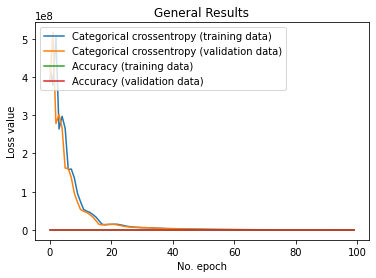

In [ ]:
# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(history.history['acc'], label='Accuracy (training data)')
plt.plot(history.history['val_acc'], label='Accuracy (validation data)')
plt.title('General Results')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCorrected/PreSplit_ColorCorrected_General Results_.67713.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCast/PreSplit_ColorCast_General Results_.52108.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCastTrained_ColorCorrectedTested/PreSplit_ColorCastTrained_ColorCorrectedTested_General Results_.29475.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCorrectedTrained_ColorCastTested/PreSplit_ColorCorrectedTrained_ColorCastTested_General Results_.10309.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCast/Randomized_ColorCast_General Results_.93852.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCorrected/Randomized_ColorCorrected_General Results_.95374.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCastTrained_ColorCorrectedTested/Randomized_ColorCastTrained_ColorCorrectedTested_General Results.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCorrectedTrained_ColorCastTested/Randomized_ColorCorrectedTrained_ColorCastTested_General Results_.13583.png')

plt.show()

# Plotting Accuracy

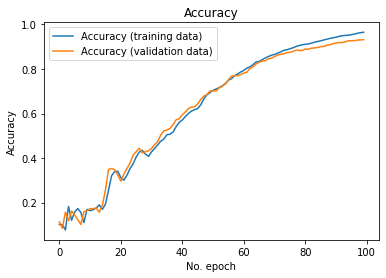

In [ ]:
# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['acc'], label='Accuracy (training data)')
plt.plot(history.history['val_acc'], label='Accuracy (validation data)')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCorrected/PreSplit_ColorCorrected_Accuracy_.67713.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCast/PreSplit_ColorCast_Accuracy_.52108.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCastTrained_ColorCorrectedTested/PreSplit_ColorCastTrained_ColorCorrectedTested_Accuracy_.29475.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCorrectedTrained_ColorCastTested/PreSplit_ColorCorrectedTrained_ColorCastTested_Accuracy_.10309.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCast/Randomized_ColorCast_Accuracy_.93852.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCorrected/Randomized_ColorCorrected_Accuracy_.95374.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCastTrained_ColorCorrectedTested/Randomized_ColorCastTrained_ColorCorrectedTested_Accuracy._14988.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCorrectedTrained_ColorCastTested/Randomized_ColorCorrectedTrained_ColorCastTested_Accuracy_.13583.png')
plt.show()

# Plotting Cross Entropy

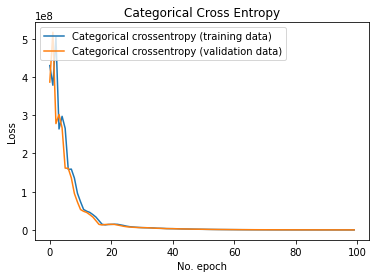

In [ ]:
# Plot history: Categorical crossentropy
plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.title('Categorical Cross Entropy')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCorrected/PreSplit_ColorCorrected_Categorical Cossentropy_.67713.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCast/PreSplit_ColorCast_Categorical Cossentropy_.52108.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCastTrained_ColorCorrectedTested/PreSplit_ColorCastTrained_ColorCorrectedTested_Categorical Cossentropy_.29475.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCorrectedTrained_ColorCastTested/PreSplit_ColorCorrectedTrained_ColorCastTested_Categorical Cossentropy_.10309.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCast/Randomized_ColorCast_Categorical Cossentropy_.93852.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCorrected/Randomized_ColorCorrected_Categorical Cossentropy_.95374.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCastTrained_ColorCorrectedTested/Randomized_ColorCastTrained_ColorCorrectedTested_Categorical Cossentropy._14988.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCorrectedTrained_ColorCastTested/Randomized_ColorCorrectedTrained_ColorCastTested_Categorical Cossentropy_.13583.png')
plt.show()

# Calculate F1 Score

Streaming output truncated to the last 5000 lines.
Y=[0 0 1 0 0 0 0 0 0 0 0 0 0 0], Predicted=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
TP=False, FP=False, TN=False, FN=True
F1 Score=0.1857707509881423
Accuracy=0.10239651416122005
Y=[0 0 1 0 0 0 0 0 0 0 0 0 0 0], Predicted=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
TP=False, FP=False, TN=False, FN=True
F1 Score=0.1854043392504931
Accuracy=0.10217391304347827
Y=[0 0 0 0 1 0 0 0 0 0 0 0 0 0], Predicted=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
TP=False, FP=False, TN=False, FN=True
F1 Score=0.18503937007874016
Accuracy=0.1019522776572668
Y=[0 0 0 0 0 0 0 0 0 0 0 0 0 1], Predicted=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
TP=False, FP=False, TN=False, FN=True
F1 Score=0.18467583497053044
Accuracy=0.10173160173160173
Y=[0 0 0 0 0 0 0 1 0 0 0 0 0 0], Predicted=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
TP=False, FP=False, TN=False, FN=True
F1 Score=0.1843137254901961
Accuracy=0.10151187904967603
Y=[0 0 0 0 1 0 0 0 0 0 0 0 0 0], Predi

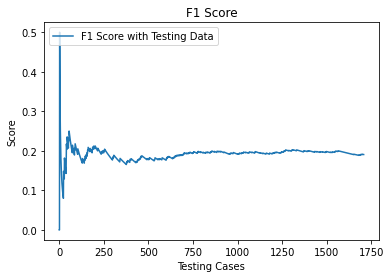

In [ ]:
# predict
results = model.predict(X_test)
print(results.shape)

# if multiple predictions give stats
TP = np.zeros(len(targets_test), dtype=bool)
FN = np.zeros(len(targets_test), dtype=bool)
TN = np.zeros(len(targets_test), dtype=bool)
FP = np.zeros(len(targets_test), dtype=bool)
pf1_scoreArray = np.zeros(len(targets_test), dtype=float)
x_axis = np.zeros(len(targets_test), dtype=int)

NTP = 0
NFN = 0
NFP = 0

accuracy_total = 0

# show the inputs and predicted outputs
for i in range(len(targets_test)):
	x_axis[i] = i
	for j in range(no_classes):
		if targets_test[i][j] == 1:
			break
	if targets_test[i][j] == 1:
		if targets_test[i][j] == np.rint(results[i][j]):
			TP[i] = True
			NTP = NTP + 1
			accuracy_total = accuracy_total + 1
		else:
			FN[i] = True
			NFN = NFN +1
	else:
		if targets_test[i][j] == np.rint(results[i][j]):
			TN[i] = True
			accuracy_total = accuracy_total +1
		else:
			FP[i] = True
			NFP = NFP + 1
	print("Y=%s, Predicted=%s" % (targets_test[i],np.rint(results[i])))
	print("TP=%s, FP=%s, TN=%s, FN=%s" % (TP[i],FP[i],TN[i],FN[i]))
	denominator = (NTP + 0.5*(NFP+NFN))
	if denominator == 0:
		denominator = 1
	pf1_scoreArray[i] = NTP/denominator
	print("F1 Score=%s" % (pf1_scoreArray[i]))
	print("Accuracy=%s" % (accuracy_total/(i+1)))
 
 # Plot history: Categorical crossentropy & Accuracy
plt.plot(x_axis, pf1_scoreArray, label='F1 Score with Testing Data')
plt.title('F1 Score')
plt.ylabel('Score')
plt.xlabel('Testing Cases')
plt.legend(loc="upper left")

#CONFUSION MATRIX IMPLEMENTATION
#https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/


#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCorrected/PreSplit_ColorCorrected_F1 Score_.67713.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCast/PreSplit_ColorCast_F1 Score_.52108.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCastTrained_ColorCorrectedTested/PreSplit_ColorCastTrained_ColorCorrectedTested_F1 Score_.29475.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/PreSplit_ColorCorrectedTrained_ColorCastTested/PreSplit_ColorCorrectedTrained_ColorCastTested_F1 Score_.10309.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCast/Randomized_ColorCast_F1 Score_.93852.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCorrected/Randomized_ColorCorrected_F1 Score_.95374.png')

#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCastTrained_ColorCorrectedTested/Randomized_ColorCastTrained_ColorCorrectedTested_F1 Score._14988.png')
#plt.savefig('/content/drive/MyDrive/Fruit Training/Graph Output/Randomized_ColorCorrectedTrained_ColorCastTested/Randomized_ColorCorrectedTrained_ColorCastTested_F1 Score_.13583.png')
plt.show()

# Saving the Weights


PreSplit Dataset - ColorCorrected Weights
*   Currently, the best accuracy is 78.2%



In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/Fruit Training/Weights/PreSplit_ColorCorrected/')

In [ ]:
# Restore the weights
model.load_weights('/content/drive/MyDrive/Fruit Training/Weights/PreSplit_ColorCorrected/')

PreSplit Dataset - ColorCast Weights
*   Currently, the best accuracy is 63.4%


In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/Fruit Training/Weights/PreSplit_ColorCorrected/')

In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/Fruit Training/Weights/PreSplit_ColorCorrected/')

Combined Dataset - ColorCorrected Weights
*   Current Accuracy 94.614%




In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/Fruit Training/Weights/Combined_ColorCorrected/')

In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/Fruit Training/Weights/Combined_ColorCorrected/')

Combined Dataset - ColorCast Weights
*   Currently, the best accuracy is 86.7%




In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/Fruit Training/Weights/Combined_ColorCast/')

In [ ]:
# Save the weights
model.load_weights('/content/drive/MyDrive/Fruit Training/Weights/Combined_ColorCast/')